# Boston Regression

In [2]:
from plotnine import *
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from pandas.plotting import scatter_matrix
boston = pd.read_csv("boston.csv")
boston.head()

,ID,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
3,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
4,7,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9


## Explore Data

In [3]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 15 columns):
ID         333 non-null int64
crim       333 non-null float64
zn         333 non-null float64
indus      333 non-null float64
chas       333 non-null int64
nox        333 non-null float64
rm         333 non-null float64
age        333 non-null float64
dis        333 non-null float64
rad        333 non-null int64
tax        333 non-null int64
ptratio    333 non-null float64
black      333 non-null float64
lstat      333 non-null float64
medv       333 non-null float64
dtypes: float64(11), int64(4)
memory usage: 39.1 KB


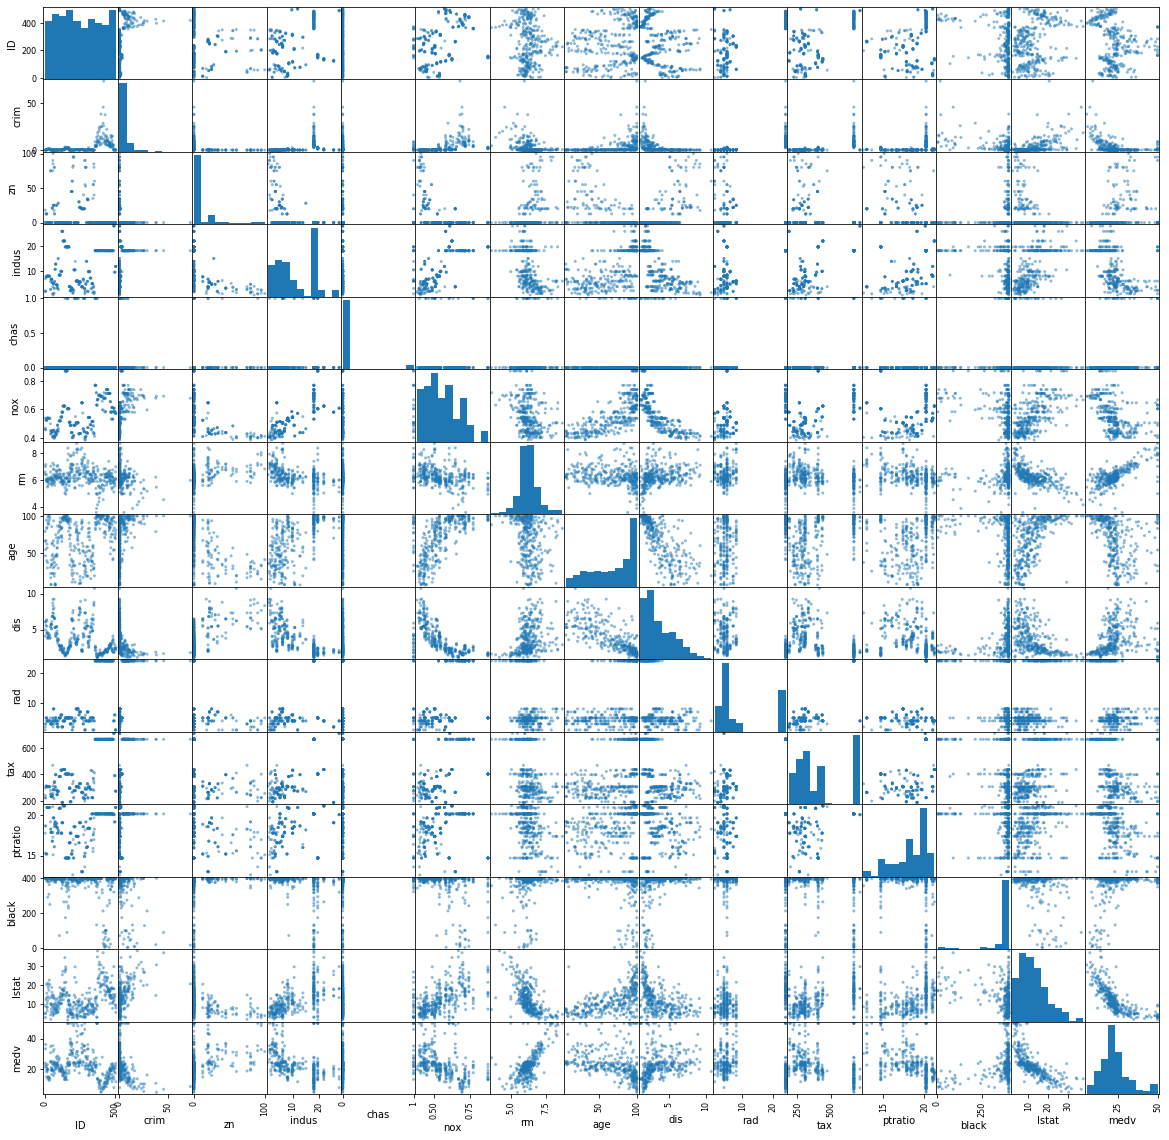

In [4]:
scatter_matrix(boston, figsize=(20, 20));

## Choose Independent Variables

**LSTAT and RM seem to have a linear relationship with MEDV**

Going to make model using *lstat* as a single independent variable and another using both variables to predict *medv*.

In [5]:
filter_boston_s = boston[['lstat','medv']]
filter_boston_s.describe()

,lstat,medv
count,333.000000,333.000000
mean,12.515435,22.768769
std,7.067781,9.173468
min,1.730000,5.000000
25%,7.180000,17.400000
50%,10.970000,21.600000
75%,16.420000,25.000000
max,37.970000,50.000000


In [6]:
filter_boston_m = boston[['rm','lstat','medv']]
filter_boston_m.describe()

,rm,lstat,medv
count,333.000000,333.000000,333.000000
mean,6.265619,12.515435,22.768769
std,0.703952,7.067781,9.173468
min,3.561000,1.730000,5.000000
25%,5.884000,7.180000,17.400000
50%,6.202000,10.970000,21.600000
75%,6.595000,16.420000,25.000000
max,8.725000,37.970000,50.000000


### Filter Out Outliers
**Values outside of Q3+IQR\*1.5 and Q1-IQR\*1.5**

*lstat*:

IQR = 16.42-7.18 = 9.25

IQR\*1.5 = 13.875

Q3+IQR\*1.5 = 30.295

Q1-IQR\*1.5 = -6.695 (no outliers beyond this point)

*medv*:

IQR = 16.42-7.18 = 7.6

IQR\*1.5 = 11.4

Q3+IQR\*1.5 = 36.4

Q1-IQR\*1.5 = 6

*rm*:

IQR = 6.595-5.884 = 0.711

IQR\*1.5 = 1.0665

Q3+IQR\*1.5 = 7.6615

Q1-IQR\*1.5 = 4.8175

In [7]:
filter_boston_s = filter_boston_s.loc[(filter_boston_s["lstat"] <= 30.295) 
                                  & (filter_boston_s["medv"] <= 36.4) 
                                  & (filter_boston_s["medv"] >= 6)]

In [8]:
filter_boston_m = filter_boston_m.loc[(filter_boston_m["lstat"] <= 30.295) 
                                  & (filter_boston_m["medv"] <= 36.4) 
                                  & (filter_boston_m["medv"] >= 6) 
                                  & (filter_boston_m["rm"] <= 7.6615)
                                  & (filter_boston_m["rm"] >= 4.8175)]

## Model
### Single Variable

In [24]:
lm = LinearRegression()

observed_x = filter_boston_s['lstat'].values.reshape(-1,1)
observed_y = filter_boston_s['medv'].values.reshape(-1,1)

lm.fit(observed_x,observed_y)

predicted_y = lm.predict(observed_x)
filter_boston_s['pred'] = lm.predict(observed_x)
filter_boston_s.head()

,lstat,medv,pred
0,4.98,24.0,27.203233
1,9.14,21.6,23.920442
2,2.94,33.4,28.813063
3,5.33,36.2,26.927036
4,12.43,22.9,21.324197


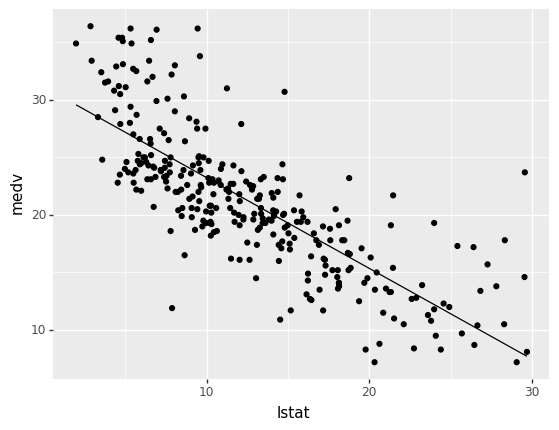

<ggplot: (306170361)>

In [25]:
ggplot(filter_boston_s,aes(x='lstat',y='medv'))+geom_point()+geom_line(aes(y='pred'))

In [26]:
print("R^2: " + str(r2_score(observed_y,predicted_y)))

R^2: 0.6155682413530384


### Multiple Variables

In [18]:
lm = LinearRegression()

observed_x = filter_boston_m[['rm','lstat']]
observed_y = filter_boston_m['medv'].values.reshape(-1,1)

lm.fit(observed_x,observed_y)

predicted_y = lm.predict(observed_x)
filter_boston_m['pred'] = lm.predict(observed_x)
filter_boston_m.head()

,rm,lstat,medv,pred
0,6.575,4.98,24.0,27.245420
1,6.421,9.14,21.6,24.062518
2,6.998,2.94,33.4,29.940527
3,7.147,5.33,36.2,28.887067
4,6.012,12.43,22.9,20.607760


In [19]:
print("R^2: " + str(r2_score(observed_y,predicted_y)))

R^2: 0.6565172072103371


## Validation
### Single Variable

In [177]:
X_train, X_test, y_train, y_test = train_test_split(filter_boston_s['lstat'], filter_boston_s['medv'], test_size=0.3)
lm.fit(X_train.values.reshape(-1, 1),y_train.values.reshape(-1, 1))
predictions = lm.predict(X_test.values.reshape(-1, 1))
print("R^2: " + str(r2_score(y_test,predictions)))

R^2: 0.5476070811226641


### Multiple Variables

In [13]:
X_train, X_test, y_train, y_test = train_test_split(filter_boston_m[['rm','lstat']], filter_boston_m['medv'], test_size=0.3)
lm.fit(X_train,y_train.values.reshape(-1, 1))
predictions = lm.predict(X_test)
print("R^2: " + str(r2_score(y_test,predictions)))

R^2: 0.6944240197677272
